In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [ ]:
#Direct URL
#tcga_url = 'https://api.gdc.cancer.gov/cases?filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.program.name%22%2C%22value%22%3A%5B%22TCGA%22%5D%7D%7D%5D%7D'

In [17]:
import requests
import json

fields = [
    "case_id",
    "submitter_id",
    "project.program.name",
    "project.project_id",
    "demographic.ethnicity",
    "demographic.gender",
    "demographic.race",
    "primary_diagnosis",
    "diagnoses.icd_10_code",
    "diagnoses.age_at_diagnosis",
    "disease_type",
    "primary_site",
    "demographic.year_of_birth",
    "demographic.year_of_death",
    "demographic.days_to_death",
    "demographic.vital_status"
    ]

fields = ",".join(fields)

cases_endpt = "https://api.gdc.cancer.gov/cases"

filters = {
            "op": "in",
            "content":{
            "field": "project.program.name",
            "value": ["TCGA"]
            }
    }

# With a GET request, the filters parameter needs to be converted
# from a dictionary to JSON-formatted string

params = {
    "filters": json.dumps(filters),
    "fields": fields,
    "format": "JSON",
    "size": "11500"
    }

response = requests.post(cases_endpt, headers = {"Content-Type": "application/json"}, json = params)
#print(response.content.decode("utf-8"))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
data = json.loads(response.content.decode('utf-8'))

In [19]:
df = pd.json_normalize(data['data'], 'hits')

In [20]:
df.head()

,id,primary_site,disease_type,case_id,submitter_id,diagnoses,project.project_id,project.program.name,demographic.race,demographic.gender,demographic.ethnicity,demographic.vital_status,demographic.year_of_death,demographic.year_of_birth,demographic.days_to_death
0,3afa1e93-1df8-4e4c-aaa4-557463f4bb77,Breast,Ductal and Lobular Neoplasms,3afa1e93-1df8-4e4c-aaa4-557463f4bb77,TCGA-A7-A0DA,"[{'age_at_diagnosis': 22708, 'icd_10_code': 'C50.9'}]",TCGA-BRCA,TCGA,white,female,not hispanic or latino,Alive,NaN,1947.0,NaN
1,b379bfb8-284e-4300-8325-85cfd6809cb8,Breast,Ductal and Lobular Neoplasms,b379bfb8-284e-4300-8325-85cfd6809cb8,TCGA-BH-A0BD,"[{'age_at_diagnosis': 17275, 'icd_10_code': 'C50.9'}]",TCGA-BRCA,TCGA,white,female,not reported,Alive,NaN,1962.0,NaN
2,22eaba28-be67-4730-9846-860bc1fca29a,Breast,Ductal and Lobular Neoplasms,22eaba28-be67-4730-9846-860bc1fca29a,TCGA-A8-A0AB,"[{'age_at_diagnosis': 19814, 'icd_10_code': 'C50.9'}]",TCGA-BRCA,TCGA,not reported,female,not reported,Alive,NaN,1955.0,NaN
3,1502c7d7-1535-4e56-9f34-30623acd50d5,Breast,Ductal and Lobular Neoplasms,1502c7d7-1535-4e56-9f34-30623acd50d5,TCGA-B6-A1KC,"[{'age_at_diagnosis': 24791, 'icd_10_code': 'C50.9'}]",TCGA-BRCA,TCGA,white,female,not hispanic or latino,Alive,NaN,1936.0,NaN
4,566792ae-f853-4a47-856d-f02cdcfcb18a,Breast,Ductal and Lobular Neoplasms,566792ae-f853-4a47-856d-f02cdcfcb18a,TCGA-A8-A07I,"[{'age_at_diagnosis': 25263, 'icd_10_code': 'C50.9'}]",TCGA-BRCA,TCGA,not reported,female,not reported,Alive,NaN,1940.0,NaN


In [21]:
#Summary Statistics of numeric and categorical features
df.describe(include='all')

,id,primary_site,disease_type,case_id,submitter_id,diagnoses,project.project_id,project.program.name,demographic.race,demographic.gender,demographic.ethnicity,demographic.vital_status,demographic.year_of_death,demographic.year_of_birth,demographic.days_to_death
count,11315,11315,11315,11315,11315,11167,11315,11315,11167,11167,11167,11167,2705.000000,10994.000000,3602.000000
unique,11315,53,27,11315,11315,10899,33,1,6,3,3,3,NaN,NaN,NaN
top,3afa1e93-1df8-4e4c-aaa4-557463f4bb77,Brain,Adenomas and Adenocarcinomas,3afa1e93-1df8-4e4c-aaa4-557463f4bb77,TCGA-A7-A0DA,"[{'age_at_diagnosis': None, 'icd_10_code': 'C34.1'}]",TCGA-BRCA,TCGA,white,female,not hispanic or latino,Alive,NaN,NaN,NaN
freq,1,1135,4521,1,1,24,1098,11315,8457,5817,8412,7510,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.194455,1948.998090,842.895614
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.426408,14.951509,943.257919
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990.000000,1902.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.000000,1938.000000,273.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,1948.000000,545.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,1958.000000,1088.000000


In [22]:
df.isna().sum()/df.shape[0]

id                           0.000000
primary_site                 0.000000
disease_type                 0.000000
case_id                      0.000000
submitter_id                 0.000000
diagnoses                    0.013080
project.project_id           0.000000
project.program.name         0.000000
demographic.race             0.013080
demographic.gender           0.013080
demographic.ethnicity        0.013080
demographic.vital_status     0.013080
demographic.year_of_death    0.760937
demographic.year_of_birth    0.028369
demographic.days_to_death    0.681662
dtype: float64

In [23]:
# Missing value check by feature
df.isnull().sum()

id                              0
primary_site                    0
disease_type                    0
case_id                         0
submitter_id                    0
diagnoses                     148
project.project_id              0
project.program.name            0
demographic.race              148
demographic.gender            148
demographic.ethnicity         148
demographic.vital_status      148
demographic.year_of_death    8610
demographic.year_of_birth     321
demographic.days_to_death    7713
dtype: int64

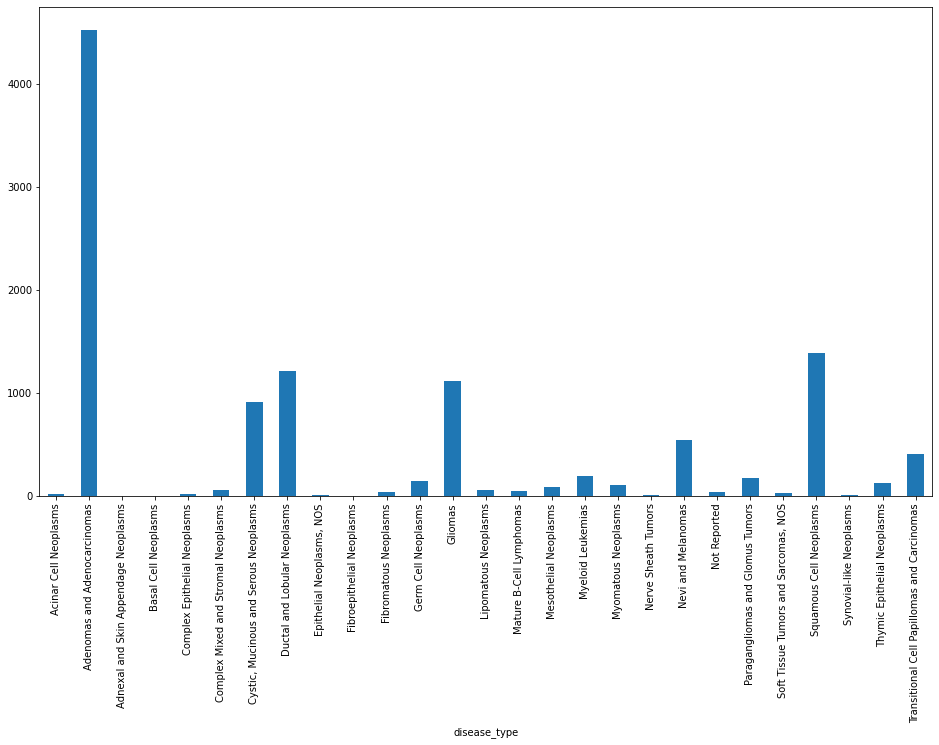

In [24]:
df.groupby('disease_type').disease_type.count().plot(kind='bar', figsize=(16,9))
plt.show()

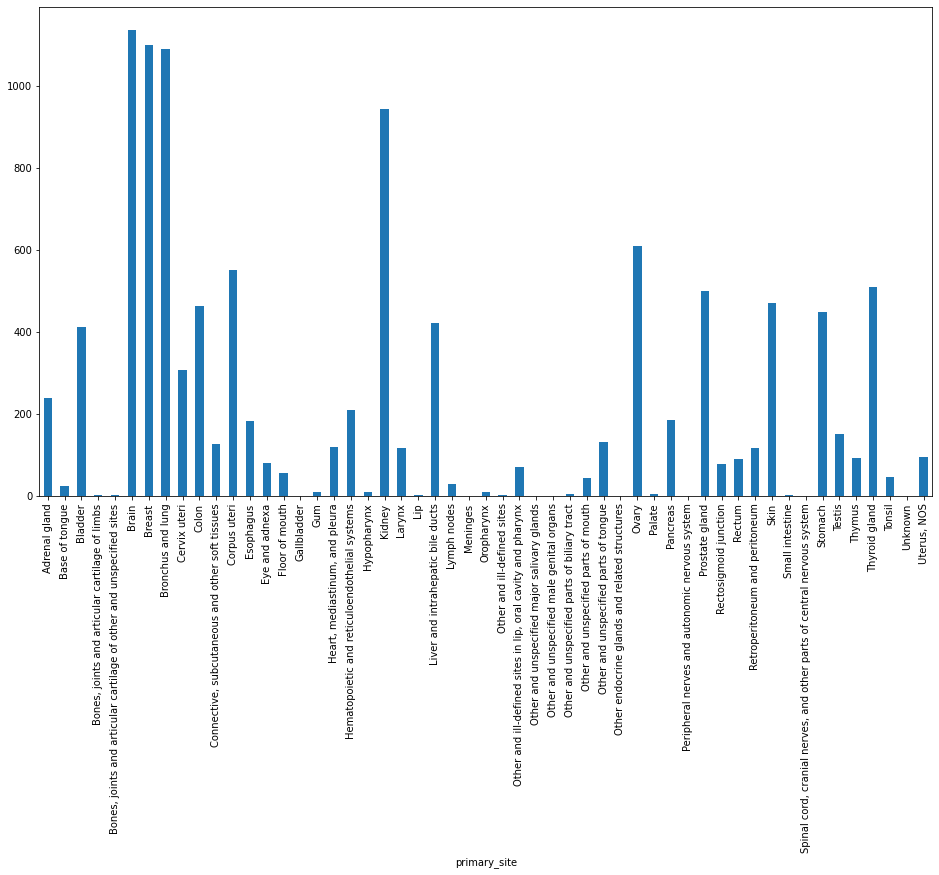

In [25]:
df.groupby('primary_site').disease_type.count().plot(kind='bar', figsize=(16,9))
plt.show()

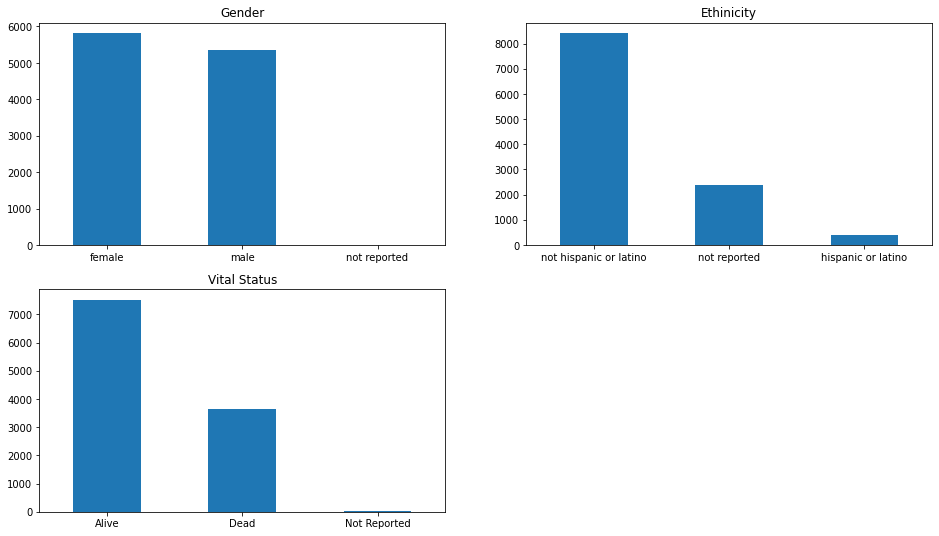

In [26]:
plt.subplot(221)
df['demographic.gender'].value_counts().plot(kind='bar', title='Gender', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
df['demographic.ethnicity'].value_counts().plot(kind='bar', title='Ethinicity')
plt.xticks(rotation=0)

plt.subplot(223)
df['demographic.vital_status'].value_counts().plot(kind='bar', title='Vital Status')
plt.xticks(rotation=0)


plt.show()

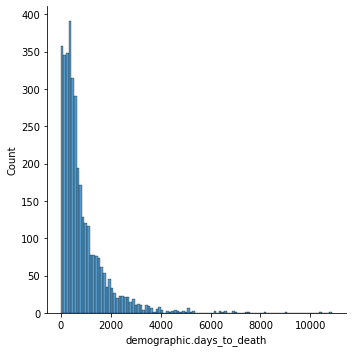

In [14]:
sns.displot(df['demographic.days_to_death'])

In [29]:
#corr = df.corr()
#sns.heatmap(corr, annot=True, square=True)
#plt.yticks(rotation=0)
#plt.show()

In [36]:
days_to_death_count = pd.pivot_table(
    data=df,
    values='demographic.days_to_death', 
    index='disease_type', 
    columns=None, 
    aggfunc='count', 
    fill_value=None, 
    margins=False, 
    dropna=True, 
    margins_name='All', 
    observed=False,
    sort=True
) 

In [37]:
# How many cases have days to death, by disease type
days_to_death_count

,demographic.days_to_death
disease_type,
Acinar Cell Neoplasms,3
Adenomas and Adenocarcinomas,997
Adnexal and Skin Appendage Neoplasms,0
Basal Cell Neoplasms,0
Complex Epithelial Neoplasms,5
Complex Mixed and Stromal Neoplasms,35
"Cystic, Mucinous and Serous Neoplasms",435
Ductal and Lobular Neoplasms,234
"Epithelial Neoplasms, NOS",3


In [43]:
df2 = df.filter(['primary_site', 'disease_type', 'submitter_id', 'demographic.race', 'demographic.gender', 'demographic.ethnicity', 'demographic.vital_status', 'demographic.days_to_death'])

In [46]:
# Scikit-learn’s train_test_split expects data in the form of features (independent variables) and target (dependent variable)

from sklearn.model_selection import train_test_split

features = ['primary_site', 'disease_type', 'demographic.race', 'demographic.gender', 'demographic.ethnicity', 'demographic.vital_status']
X = df.loc[:, features]
y = df.loc[:,['demographic.days_to_death']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)